In [ ]:
import os
os.environ["JAVA_HOME"] = "C:\\Program Files\\Java\\jdk-17"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "\\bin;" + os.environ["PATH"]
from pyspark.sql import SparkSession


In [2]:
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()   
path = "dataset.csv"
data = spark.read.csv(path, header=True, inferSchema=True)
data.show()

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

In [ ]:
data.printSchema()


ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée

In [ ]:
data.show(5)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93826.63|

In [ ]:
data.describe().show()

+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|Surname|      CreditScore|Geography|Gender|               Age|            Tenure|          Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|  10000|            10000|    10000| 10000|             10000|             10000|            10000|             10000|              10000|              10000|            10000|              10000|
|   mean|            5000.5|

In [ ]:
from pyspark.sql.functions import col, sum

print(data.columns)
# nulldata = data.select([sum(col(c).isNull().cast('int')).alias(c) for c in data.columns])
nulldata = data.select([sum(col(c).isNull().cast('int')).alias(c) for c in data.columns])
nulldata.show()



['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|Surname|CreditScore|Geography|Gender|Age|Tenure|Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|        0|         0|      0|          0|        0|     0|  0|     0|      0|            0|        0|             0|              0|     0|
+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+



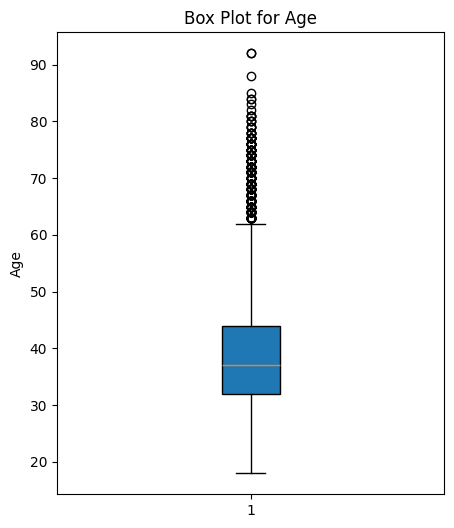

In [ ]:
import matplotlib.pyplot as plt
age_Data = data.select("age").toPandas()

# Plot boxplots for all numeric columns
plt.figure(figsize=(5, 6))
plt.boxplot(age_Data["age"], vert=True, patch_artist=True)
plt.title("Box Plot for Age")   
plt.ylabel("Age")
plt.show()

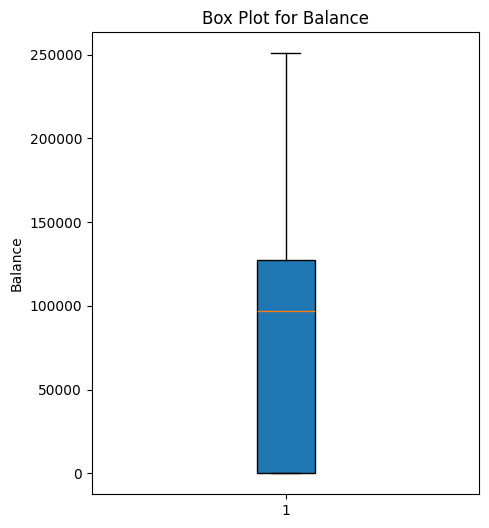

In [ ]:
age_Data = data.select("Balance").toPandas()    

# Plot boxplots for all numeric columns
plt.figure(figsize=(5, 6))
plt.boxplot(age_Data["Balance"], vert=True, patch_artist=True)
plt.title("Box Plot for Balance")   
plt.ylabel("Balance")
plt.show()

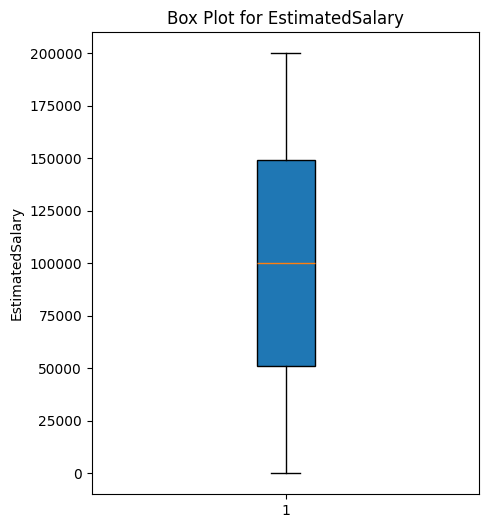

In [ ]:
age_Data = data.select("EstimatedSalary").toPandas()    

# Plot boxplots for all numeric columns
plt.figure(figsize=(5, 6))
plt.boxplot(age_Data["EstimatedSalary"], vert=True, patch_artist=True)
plt.title("Box Plot for EstimatedSalary")   
plt.ylabel("EstimatedSalary")
plt.show()

In [ ]:
# for col in df.columns:
#     plt.figure(figsize=(8, 6))
#     plt.bar(df.index, df[col], color='skyblue')
#     plt.xlabel("Index")
#     plt.ylabel(col)
#     plt.title(f"Bar Plot of {col}")
#     plt.show()

NameError: name 'df' is not defined

In [ ]:
age_Data = data.select("CreditScore").toPandas()
plt.figure(figsize=(12, 6))
plt.bar(age_Data["CreditScore"],  color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Goals")
plt.title("Goals per Player")
plt.tight_layout()
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1200x600 with 0 Axes>